-----------
Initializing structure...
time for choose_chunkdivision = 9.799e-05 s
Working in 2D dimensions.
Computational cell is 13 x 13 x 0 with resolution 10
time for set_epsilon = 0.0189691 s
-----------


FloatProgress(value=0.0, description='0% done ', max=400.0)

Normalizing field data...
run 0 finished at t = 400.0 (8000 timesteps)
Generating MP4...


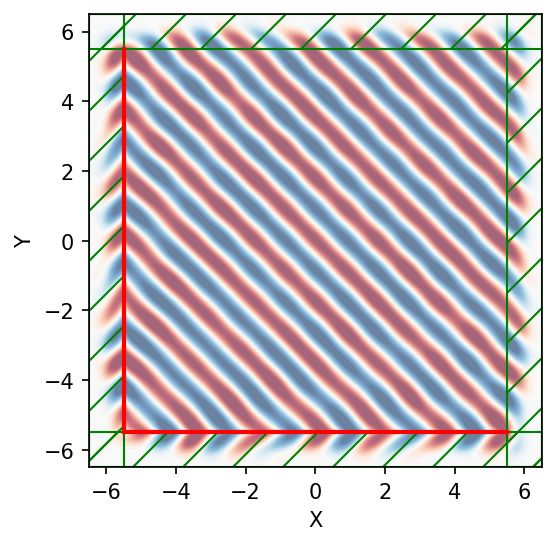

In [64]:
# This example creates an approximate Ez-polarized planewave in vacuum (2D simulation with PML)
# propagating at a 45-degree angle, by using a couple of current sources
# with amplitude exp(ikx) corresponding to the desired planewave.
from __future__ import division
import matplotlib.pyplot as plt
import cmath
import math
import meep as mp
from IPython.display import Video

s = 11  # the size of the computational cell, not including PML
dpml = 1  # thickness of PML layers

sxy = s + 2 * dpml  # cell size, including PML
cell = mp.Vector3(sxy, sxy, 0)

pml_layers = [mp.PML(dpml)]
resolution = 10


# pw-amp is a function that returns the amplitude exp(ik(x+x0)) at a
# given point x.  (We need the x0 because current amplitude functions
# in Meep are defined relative to the center of the current source,
# whereas we want a fixed origin.)  Actually, it is a function of k
# and x0 that returns a function of x ...
def pw_amp(k, x0):
    def _pw_amp(x):
        return cmath.exp(1j * k.dot(x + x0))
    return _pw_amp

fcen = 0.8  # pulse center frequency
df = 0.02  # turn-on bandwidth
kdir = mp.Vector3(1, 1)  # direction of k (length is irrelevant)
n = 1 # refractive index of material containing the source
k = kdir.unit().scale(2 * math.pi * fcen * n)  # k with correct length

sources = [
    mp.Source(
        mp.ContinuousSource(fcen, fwidth=df),
        component=mp.Ez,
        center=mp.Vector3(-0.5 * s, 0),
        size=mp.Vector3(0, s),
        amp_func=pw_amp(k, mp.Vector3(x=-0.5 * s))
    ),
    mp.Source(
        mp.ContinuousSource(fcen, fwidth=df),
        component=mp.Ez,
        center=mp.Vector3(0, -0.5 * s),
        size=mp.Vector3(s, 0),
        amp_func=pw_amp(k, mp.Vector3(y=-0.5 * s))
    )
]

sim = mp.Simulation(
    cell_size=cell,
    sources=sources,
    boundary_layers=pml_layers,
    resolution=resolution,
    default_material=mp.Medium(index=n),
)

t = 400  # run time
f = plt.figure(dpi=150)
Animate = mp.Animate2D(sim, fields=mp.Ez, f=f, realtime=False, normalize=True)
sim.run(mp.at_every(4,Animate), until=t)

# Process the animation and view it
filename = "angle2D.mp4"
Animate.to_mp4(5,filename)
Video(filename)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000286102 s
Working in 3D dimensions.
Computational cell is 13 x 13 x 13 with resolution 10
time for set_epsilon = 3.49219 s
-----------


FloatProgress(value=0.0, description='0% done ', max=400.0)

Meep progress: 2.0500000000000003/400.0 = 0.5% done in 4.0s, 779.6s to go
on time step 41 (time=2.05), 0.0978517 s/step
Meep progress: 7.550000000000001/400.0 = 1.9% done in 8.1s, 418.6s to go
on time step 151 (time=7.55), 0.0366984 s/step
Meep progress: 13.200000000000001/400.0 = 3.3% done in 12.1s, 353.7s to go
on time step 264 (time=13.2), 0.0355348 s/step
Meep progress: 19.3/400.0 = 4.8% done in 16.1s, 317.2s to go
on time step 386 (time=19.3), 0.0328862 s/step
Meep progress: 25.55/400.0 = 6.4% done in 20.1s, 294.5s to go
on time step 511 (time=25.55), 0.0321008 s/step
Meep progress: 31.85/400.0 = 8.0% done in 24.1s, 278.9s to go
on time step 637 (time=31.85), 0.0320004 s/step
Meep progress: 38.0/400.0 = 9.5% done in 28.1s, 268.1s to go
on time step 760 (time=38), 0.0326546 s/step
Meep progress: 43.900000000000006/400.0 = 11.0% done in 32.2s, 260.9s to go
on time step 878 (time=43.9), 0.0340536 s/step
Meep progress: 49.95/400.0 = 12.5% done in 36.2s, 253.4s to go
on time step 1000 

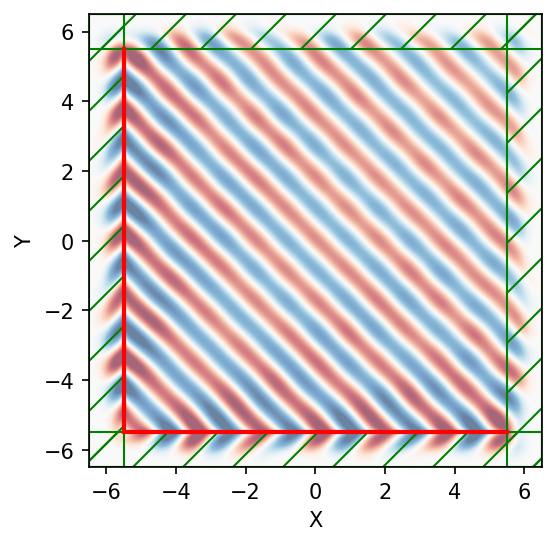

In [65]:
# This example creates an approximate Ez-polarized planewave in vacuum (3D simulation with PML)
# propagating at a 45-degree angle, by using a couple of current sources
# with amplitude exp(ikx) corresponding to the desired planewave.
from __future__ import division
import matplotlib.pyplot as plt
import cmath
import math
import meep as mp
from IPython.display import Video

s = 11  # the size of the computational cell, not including PML
dpml = 1  # thickness of PML layers

sxy = s + 2 * dpml  # cell size, including PML
cell = mp.Vector3(sxy, sxy, sxy)

pml_layers = [mp.PML(dpml)]
resolution = 10


# pw-amp is a function that returns the amplitude exp(ik(x+x0)) at a
# given point x.  (We need the x0 because current amplitude functions
# in Meep are defined relative to the center of the current source,
# whereas we want a fixed origin.)  Actually, it is a function of k
# and x0 that returns a function of x ...
def pw_amp(k, x0):
    def _pw_amp(x):
        return cmath.exp(1j * k.dot(x + x0))
    return _pw_amp

fcen = 0.8  # pulse center frequency
df = 0.02  # turn-on bandwidth
kdir = mp.Vector3(1, 1)  # direction of k (length is irrelevant)
n = 1 # refractive index of material containing the source
k = kdir.unit().scale(2 * math.pi * fcen * n)  # k with correct length

sources = [
    mp.Source(
        mp.ContinuousSource(fcen, fwidth=df),
        component=mp.Ez,
        center=mp.Vector3(-0.5 * s, 0,0),
        size=mp.Vector3(0, s,s),
        amp_func=pw_amp(k, mp.Vector3(x=-0.5 * s))
    ),
    mp.Source(
        mp.ContinuousSource(fcen, fwidth=df),
        component=mp.Ez,
        center=mp.Vector3(0, -0.5 * s, 0),
        size=mp.Vector3(s, 0, s),
        amp_func=pw_amp(k, mp.Vector3(y=-0.5 * s))
    )
]

sim = mp.Simulation(
    cell_size=cell,
    sources=sources,
    boundary_layers=pml_layers,
    resolution=resolution,
    default_material=mp.Medium(index=n),
)

t = 400  # run time
f = plt.figure(dpi=150)
volume=mp.Block(size=mp.Vector3(sxy,sxy,0), center=mp.Vector3(0,0,5))
Animate = mp.Animate2D(sim,output_plane=volume, fields=mp.Ez, f=f, realtime=False, normalize=True)
sim.run(mp.at_every(4,Animate), until=t)

# Process the animation and view it
filename = "angle3D.mp4"
Animate.to_mp4(5,filename)
Video(filename)

-----------
Initializing structure...
time for choose_chunkdivision = 2.71797e-05 s
Working in 2D dimensions.
Computational cell is 11 x 13 x 0 with resolution 10
time for set_epsilon = 0.0157089 s
-----------
Meep: using complex fields.


FloatProgress(value=0.0, description='0% done ', max=400.0)

Normalizing field data...
run 0 finished at t = 400.0 (8000 timesteps)
Generating MP4...


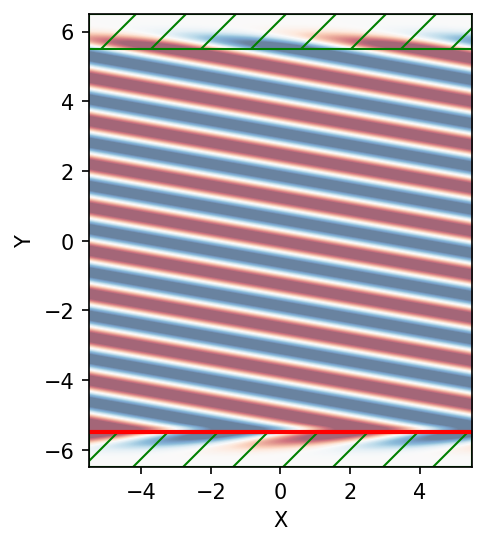

In [66]:
# This example creates an approximate Ez-polarized planewave in vacuum (2D simulation, periodic)
# propagating at a 45-degree angle, by using a couple of current sources
# with amplitude exp(ikx) corresponding to the desired planewave.
from __future__ import division
import matplotlib.pyplot as plt
import cmath
import math
import meep as mp
from IPython.display import Video

s = 11  # the size of the computational cell, not including PML
sx=11
dpml = 1  # thickness of PML layers

sxy = s + 2 * dpml  # cell size, including PML
cell = mp.Vector3(sx, sxy, 0)

pml_layers = [mp.PML(thickness=dpml, direction=mp.Y)]
resolution = 10

theta_src=math.radians(10)
# pw-amp is a function that returns the amplitude exp(ik(x+x0)) at a
# given point x.  (We need the x0 because current amplitude functions
# in Meep are defined relative to the center of the current source,
# whereas we want a fixed origin.)  Actually, it is a function of k
# and x0 that returns a function of x ...
def pw_amp(k,x0):
    def _pw_amp(x):
      return cmath.exp(1j*2*math.pi*k.dot(x+x0))
    return _pw_amp

fcen = 0.8  # pulse center frequency
df = 0.02  # turn-on bandwidth
k = mp.Vector3(math.sin(theta_src),math.cos(theta_src),0).scale(fcen)
if theta_src == 0:
    k = mp.Vector3(0,0,0)

sources = [
    mp.Source(
        mp.ContinuousSource(fcen, fwidth=df),
        component=mp.Ez,
        center=mp.Vector3(0, -0.5 * s),
        size=mp.Vector3(sx, 0),
        amp_func=pw_amp(k, mp.Vector3(y=-0.5 * sx))
    )
]

sim = mp.Simulation(
    cell_size=cell,
    sources=sources,
    k_point=k,
    boundary_layers=pml_layers,
    resolution=resolution,
    default_material=mp.Medium(index=n),
)

t = 400  # run time
f = plt.figure(dpi=150)
Animate = mp.Animate2D(sim, fields=mp.Ez, f=f, realtime=False, normalize=True)
sim.run(mp.at_every(4,Animate), until=t)

# Process the animation and view it
filename = "angle_per2D.mp4"
Animate.to_mp4(5,filename)
Video(filename)


-----------
Initializing structure...
time for choose_chunkdivision = 2.40803e-05 s
Working in 3D dimensions.
Computational cell is 11 x 13 x 11 with resolution 10
time for set_epsilon = 2.41532 s
-----------
Meep: using complex fields.


FloatProgress(value=0.0, description='0% done ', max=400.0)

Meep progress: 3.5500000000000003/400.0 = 0.9% done in 4.0s, 450.5s to go
on time step 71 (time=3.55), 0.0567554 s/step


/home/nikolaos/m_python/envs/pmp2/lib/python3.9/site-packages/meep/visualization.py:198: UserWarning: The specified user volume is larger than the simulation domain and has been truncated.
  warnings.warn('The specified user volume is larger than the simulation domain and has been truncated.')


Meep progress: 8.75/400.0 = 2.2% done in 8.0s, 359.7s to go
on time step 175 (time=8.75), 0.0385608 s/step
Meep progress: 13.950000000000001/400.0 = 3.5% done in 12.1s, 334.0s to go
on time step 279 (time=13.95), 0.0386838 s/step
Meep progress: 18.900000000000002/400.0 = 4.7% done in 16.1s, 324.6s to go
on time step 378 (time=18.9), 0.0407122 s/step
Meep progress: 23.950000000000003/400.0 = 6.0% done in 20.1s, 316.2s to go
on time step 479 (time=23.95), 0.0399714 s/step
Meep progress: 29.25/400.0 = 7.3% done in 24.2s, 306.2s to go
on time step 585 (time=29.25), 0.0379527 s/step
Meep progress: 34.5/400.0 = 8.6% done in 28.2s, 298.6s to go
on time step 690 (time=34.5), 0.0383066 s/step
Meep progress: 39.7/400.0 = 9.9% done in 32.2s, 292.4s to go
on time step 794 (time=39.7), 0.038774 s/step
Meep progress: 44.800000000000004/400.0 = 11.2% done in 36.2s, 287.3s to go
on time step 896 (time=44.8), 0.0393741 s/step
Meep progress: 49.85/400.0 = 12.5% done in 40.2s, 282.6s to go
on time step 9

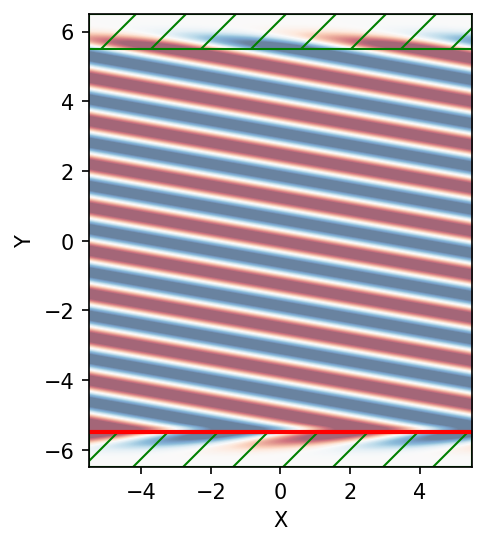

In [69]:
# This example creates an approximate Ez-polarized planewave in vacuum (3D simulation, periodic)
# propagating at a 45-degree angle, by using a couple of current sources
# with amplitude exp(ikx) corresponding to the desired planewave.
from __future__ import division
import matplotlib.pyplot as plt
import cmath
import math
import meep as mp
from IPython.display import Video

s = 11  # the size of the computational cell, not including PML
sx=11
dpml = 1  # thickness of PML layers

sxy = s + 2 * dpml  # cell size, including PML
cell = mp.Vector3(sx, sxy, sx)

pml_layers = [mp.PML(thickness=dpml, direction=mp.Y)]
resolution = 10

theta_src=math.radians(10)
# pw-amp is a function that returns the amplitude exp(ik(x+x0)) at a
# given point x.  (We need the x0 because current amplitude functions
# in Meep are defined relative to the center of the current source,
# whereas we want a fixed origin.)  Actually, it is a function of k
# and x0 that returns a function of x ...
def pw_amp(k,x0):
    def _pw_amp(x):
      return cmath.exp(1j*2*math.pi*k.dot(x+x0))
    return _pw_amp

fcen = 0.8  # pulse center frequency
df = 0.02  # turn-on bandwidth
k = mp.Vector3(math.sin(theta_src),math.cos(theta_src),0).scale(fcen)
if theta_src == 0:
    k = mp.Vector3(0,0,0)

sources = [
    mp.Source(
        mp.ContinuousSource(fcen, fwidth=df),
        component=mp.Ez,
        center=mp.Vector3(0, -0.5 * s),
        size=mp.Vector3(sx, 0,sx),
        amp_func=pw_amp(k, mp.Vector3(y=-0.5 * sx))
    )
]

sim = mp.Simulation(
    cell_size=cell,
    sources=sources,
    k_point=k,
    boundary_layers=pml_layers,
    resolution=resolution,
    default_material=mp.Medium(index=n),
)

t = 400  # run time
f = plt.figure(dpi=150)
volume=mp.Block(size=mp.Vector3(sxy,sxy,0), center=mp.Vector3(0,0,5))
Animate = mp.Animate2D(sim,output_plane=volume, fields=mp.Ez, f=f, realtime=False, normalize=True)
sim.run(mp.at_every(4,Animate), until=t)

# Process the animation and view it
filename = "angle_per3D.mp4"
Animate.to_mp4(5,filename)
Video(filename)